In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#import viz_kmeans

from pydataset import data

np.set_printoptions(suppress=True)

### Introduction: K-Means clustering algorithm
- Most popular "clustering" algorithm
- Unsupervised Algorithm
- Search for a pre-determined number of clusters within an unlabeled dataset 
- k = number of clusters (user specified)
- Distance based

### How K-means algorithm works:

Step 1:  Randomly choose k starting centers

Step 2: **Cluster Assignment:**  
        Assign each observation to nearest Center (based on distance). Observations assigned to a center are part of a cluster.  
     
Step 3: **Move Centeroids:**  
Recalculate new centroids location (mean of observations within a cluster).  

Step 4+: Keep repeating step 2 and 3 until centers do not move.

In [2]:
# visualize some data 
#viz_kmeans.make_blob()

#can see about 4 clusters
#how can the algorithm go in here and come to a similar point

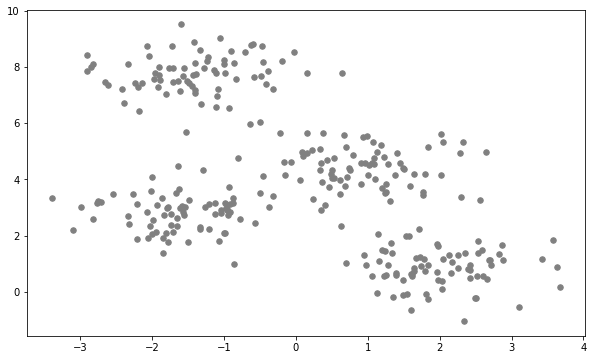

### Visualization: 

K-means visuals (Slideshow): 
https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

Animation (Thanks Zach!): https://stats-demos.zach.wiki/static/kmeans_clustering.mp4

### Sklearn implementation

In [3]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#change column names to a cleaner look
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
#start with 2 vars to keep it simple..we can do more, but 2 for now
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length']]
X.head(3)

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7


In [6]:
# Scale the X
#since it is distance based, it's generally good to scale the data
#it's not different units, so it won't make too much of a difference
#this should be done on train, but using whole df for now

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
X_scaled.head()

,petal_length,sepal_length
1,-1.340227,-0.900681
2,-1.340227,-1.143017
3,-1.397064,-1.385353
4,-1.283389,-1.506521
5,-1.340227,-1.021849


In [8]:
#define the thing
kmeans = KMeans(n_clusters=3)
        #sklearn import w/ capital K
    
# fit the thing
kmeans.fit(X_scaled) #usually fit on train X scaled

# Use (predict using) the thing 
kmeans.predict(X_scaled) #usually predict on train X scaled
#gives us labels for each cluster for each observation

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [11]:
# lets look at sample of 15 randomly selected rows in iris dataset
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
140,6.9,3.1,5.4,2.1,virginica,1
57,6.3,3.3,4.7,1.6,versicolor,2
19,5.7,3.8,1.7,0.3,setosa,0
137,6.3,3.4,5.6,2.4,virginica,1
60,5.2,2.7,3.9,1.4,versicolor,2
30,4.7,3.2,1.6,0.2,setosa,0
49,5.3,3.7,1.5,0.2,setosa,0
122,5.6,2.8,4.9,2.0,virginica,2
44,5.0,3.5,1.6,0.6,setosa,0
41,5.0,3.5,1.3,0.3,setosa,0


In [12]:
X_scaled.head()

,petal_length,sepal_length,cluster
1,-1.340227,-0.900681,0
2,-1.340227,-1.143017,0
3,-1.397064,-1.385353,0
4,-1.283389,-1.506521,0
5,-1.340227,-1.021849,0


In [13]:
X_scaled.sample(15)

,petal_length,sepal_length,cluster
131,1.331133,1.886180,1
56,0.421734,-0.173674,2
99,-0.430828,-0.900681,0
18,-1.340227,-0.900681,0
35,-1.283389,-1.143017,0
91,0.364896,-0.416010,2
60,0.080709,-0.779513,2
5,-1.340227,-1.021849,0
133,1.046945,0.674501,1
11,-1.283389,-0.537178,0


In [14]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
#viz_kmeans.viz_iris(iris, kmeans)

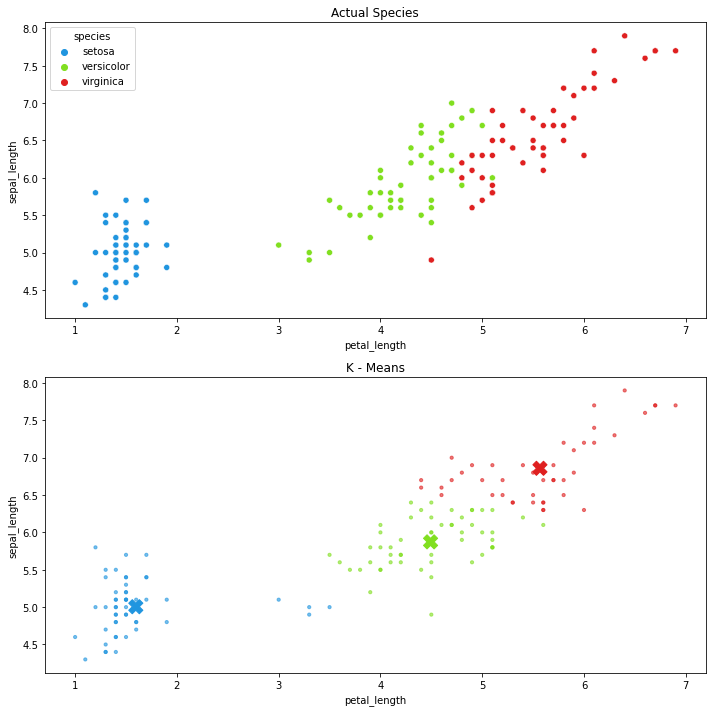

The model does not know the species, its just assigning numbers to groups




Usually we don't know the answers / how many clusters there are, so we are just trying to find a pattern 

### Attributes for Kmeans : 

- **cluster_centers_**: The center point of each cluster (aka *centeroids*).

- **labels_**: The labels for each observation.

- **intertia_**: Sum of squared distances of samples to their closest cluster center.

In [15]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[-1.22865676, -1.01511749],
       [ 1.02844019,  1.22961906],
       [ 0.41744409,  0.03665519]])

In [16]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,petal_length,sepal_length
0,-1.228657,-1.015117
1,1.028440,1.229619
2,0.417444,0.036655


In [17]:
# Centroids for UNSCALED data?

centroids = iris.groupby('cluster')['petal_length', 'sepal_length'].mean()
centroids

#centeroids are the mean of all the points
#even though we don't have the centeroid values in their original units, 
#they can always be calculated,
#once I know my clusters. Clusters are known since we have the labels already

,petal_length,sepal_length
cluster,,
0,1.596296,5.005556
1,5.567442,6.858140
2,4.492453,5.873585


In [18]:
# Another way to get centeroids for unscaled data
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[1.5962963 , 5.00555556],
       [5.56744186, 6.85813953],
       [4.49245283, 5.87358491]])

In [19]:
# Labels (same as from predict) (kmeans.predict(X_scaled) )
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

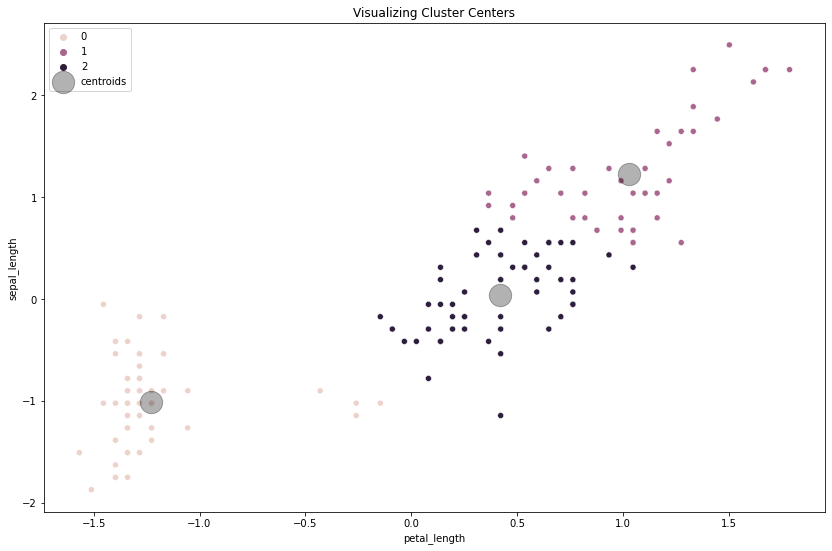

In [20]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_length', y='sepal_length', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [21]:
#to make colors different: pass on a string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


In [22]:
#to make colors different: pass on a string
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,petal_length,sepal_length,cluster
1,-1.340227,-0.900681,cluster_0
2,-1.340227,-1.143017,cluster_0
3,-1.397064,-1.385353,cluster_0
4,-1.283389,-1.506521,cluster_0
5,-1.340227,-1.021849,cluster_0


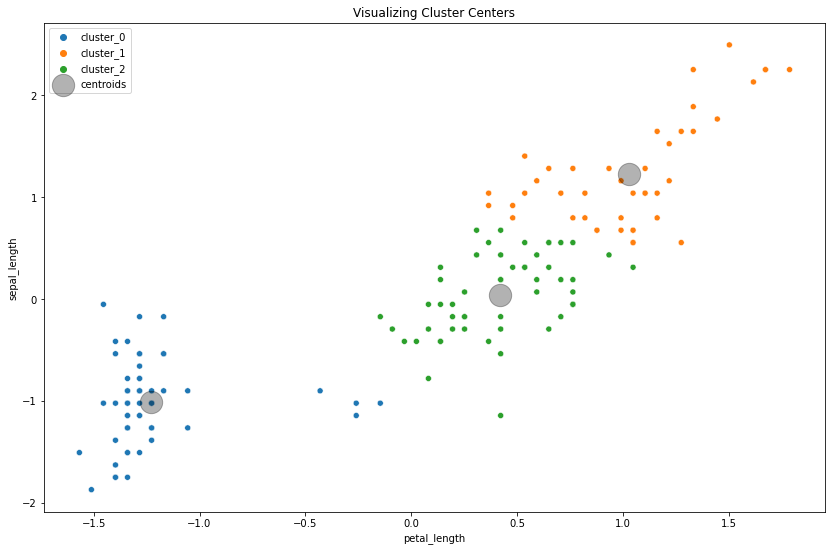

In [23]:
#rerun plot to get new colors on scaled data
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_length', y='sepal_length', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

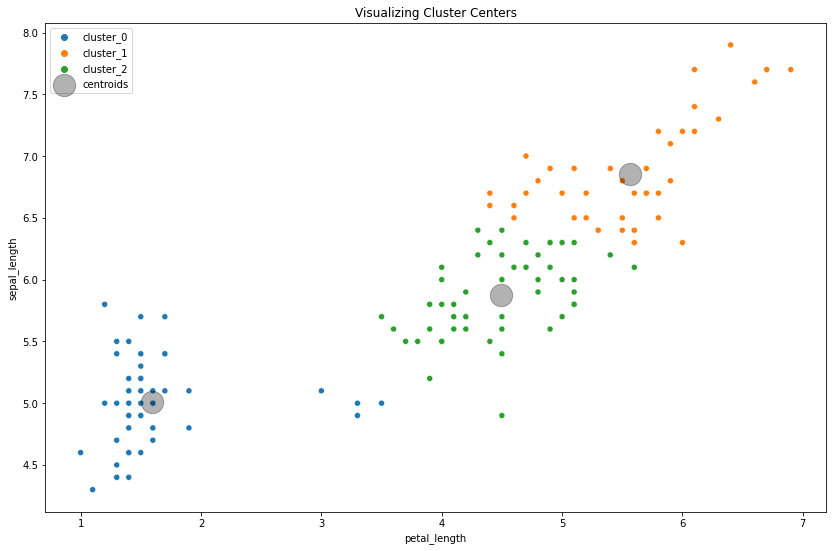

In [24]:
# rerun plot to visualize the clusters along with the centers on UNSCALED data
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data=iris, hue='cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x='petal_length', y='sepal_length', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();


In [25]:
#start all over to try 2 clusters
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

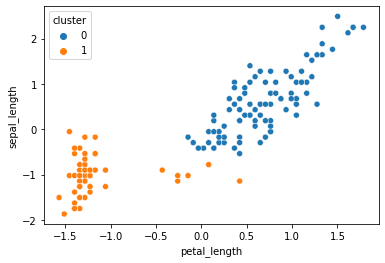

In [26]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')

## How to choose 'k'

#### 1. A *prior* knowledge about application domain/educated guess
- How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### 2.  Search for a 'good' k value
- Try different k values and evaluate results
    - **Inertia** = sum of squared distances from each point to it's assigned centeroid. The measure of how spread out the data is corresponding to its centeroid.
        - high inertia: points that are more spread out away from its centeroid
        - low inertia: less spread out 
    - minimize inertia by adjusting k value accordingly by using elbow method
    - Use **elbow method** (using inertia) to choose k

- Careful to not make k = # of observations. Inertia would be 0. Each point would be a cluster within itself and be its own centeroid. That is why we use the elbow method

In [27]:
#sum of squared distances from each point to its assigned centeroid
kmeans.inertia_

84.72073862193372

In [28]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

84.72073862193372

In [29]:
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

43.034691996034674

In [30]:
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

28.498191743756724

In [31]:
k =5 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

22.395986080151957

- inertia gets lower as we increase # of centeroids (clusters)
- it is best to pick a k where the elbow sits (around 3 or 4)

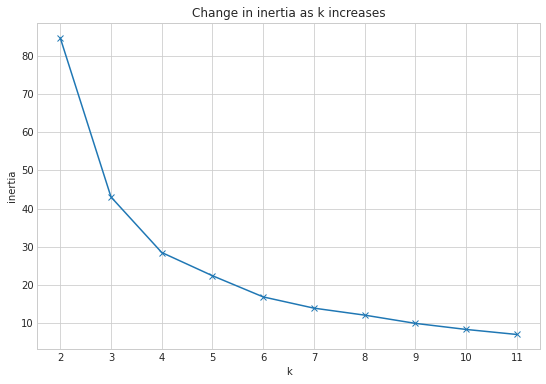

In [32]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

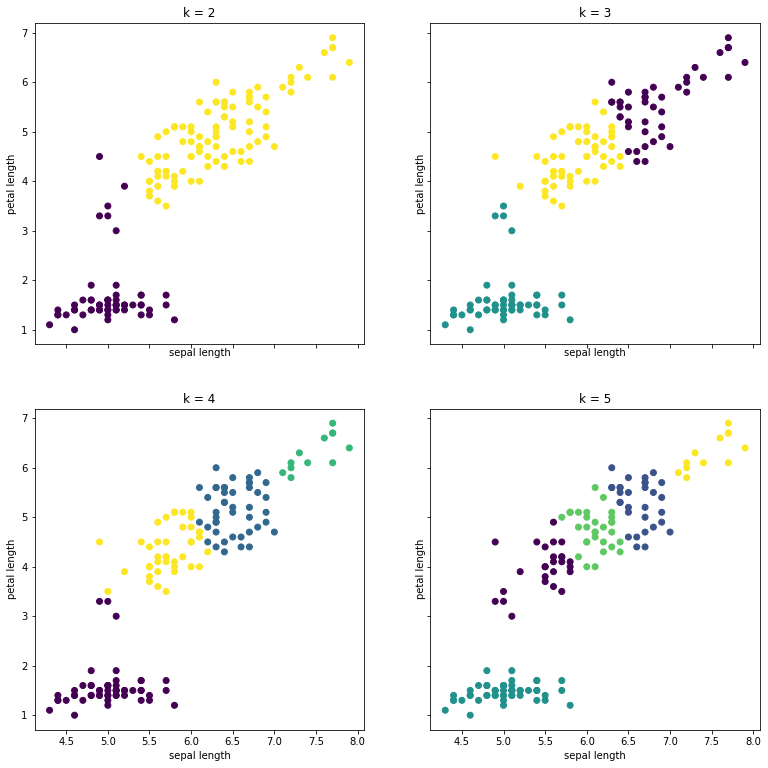

In [33]:
# What value of k is appropriate?
# can also visualize clusters

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [34]:
# Useful functions I used:


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

In [35]:
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

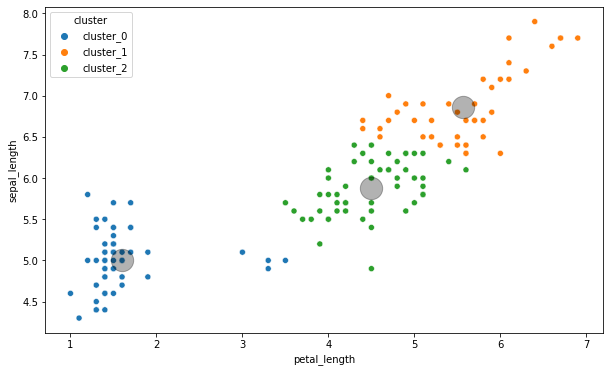

In [36]:
create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)